## Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

## Data Loading


In [26]:
def load_data(np_path_XYs_path, np_path_XY2s_path):
    np_path_XYs = np.genfromtxt(np_path_XYs_path, delimiter=',')
    np_path_XY2s = np.genfromtxt(np_path_XY2s_path, delimiter=',')
    return np_path_XYs, np_path_XY2s

## Data Preprocessing

In [27]:
def preprocess_data(np_path_XYs, np_path_XY2s):
    sz1 = len(np.unique(np_path_XYs[:, 0]))
    sz2 = len(np.unique(np_path_XY2s[:, 0]))

    XY = []
    XY2 = []

    for i in range(sz1):
        new_path = np_path_XYs[np_path_XYs[:, 0] == i][:, 2:]
        XY.append(new_path)

    for i in range(sz2):
        new_path = np_path_XY2s[np_path_XY2s[:, 0] == i][:, 2:]
        XY2.append(new_path)

    return XY, XY2, sz1, sz2


## Visualizing the data

In [28]:
def visualize_curves(XY, sz1):
    for i in range(sz1):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        for j in range(i + 1):
            ax.plot(XY[j][:, 0], XY[j][:, 1], linewidth=2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

def visualize_complete_curve(XY, sz1):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i in range(sz1):
        ax.plot(XY[i][:, 0], XY[i][:, 1], linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


## Curve Analysis

In [29]:
def analyze_curves(XY, sz1):
    start_points = []
    end_points = []

    for i in range(sz1):
        a = XY[i][0]
        b = XY[i][len(XY[i])-1]
        start_points.append(a)
        end_points.append(b)

    curve_num = {i: i//2 for i in range(2*sz1)}
    partner = {i: i+1 if i % 2 == 0 else i-1 for i in range(2*sz1)}
    umap = {2*i: start_points[i] for i in range(sz1)}
    umap.update({2*i+1: end_points[i] for i in range(sz1)})

    return curve_num, partner, umap


## Reconstruction

In [30]:
def reconstruct_single_curve(node_sequence, umap, XY, partner):
    curve_points = []
    i = 0

    while i < len(node_sequence) - 1:
        cur_node = node_sequence[i]
        next_node = node_sequence[i + 1]

        if partner[cur_node] != next_node:
            i += 1
        else:
            start_point = umap[cur_node]
            end_point = umap[next_node]
            found_curve = False

            for curve in XY:
                curve_start = curve[0]
                curve_end = curve[-1]

                if (np.array_equal(curve_start, start_point) and np.array_equal(curve_end, end_point)) or (np.array_equal(curve_start, end_point) and np.array_equal(curve_end, start_point)):
                    if np.array_equal(curve_start, start_point):
                        curve_points.extend(curve)
                    else:
                        curve_points.extend(curve[::-1])
                    found_curve = True
                    break

            if not found_curve:
                raise ValueError("Curve with the specified start and end points not found in XY.")

            i += 2

    return np.array(curve_points)


## Utility Functions

In [31]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


## Pipeline Execution

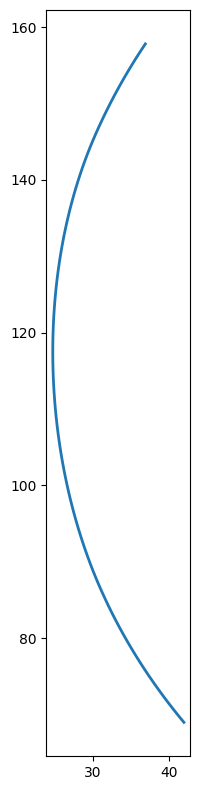

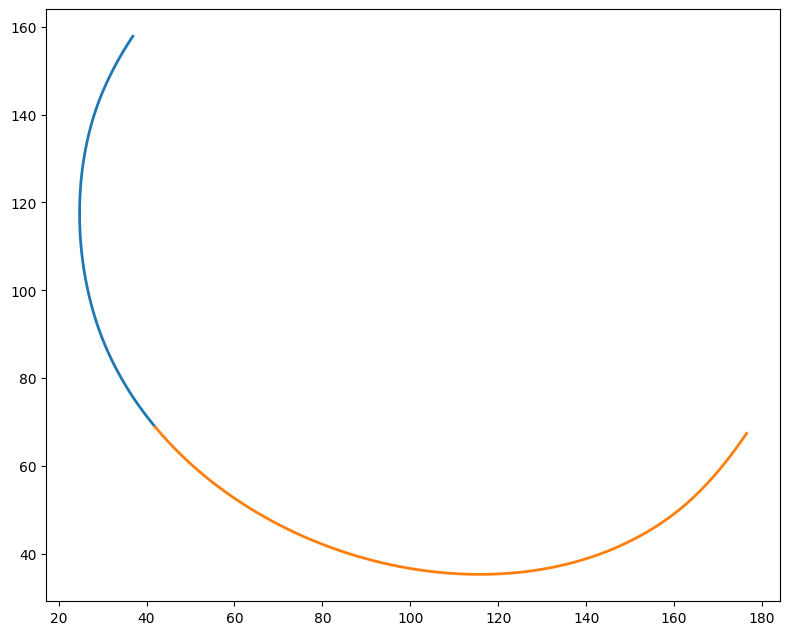

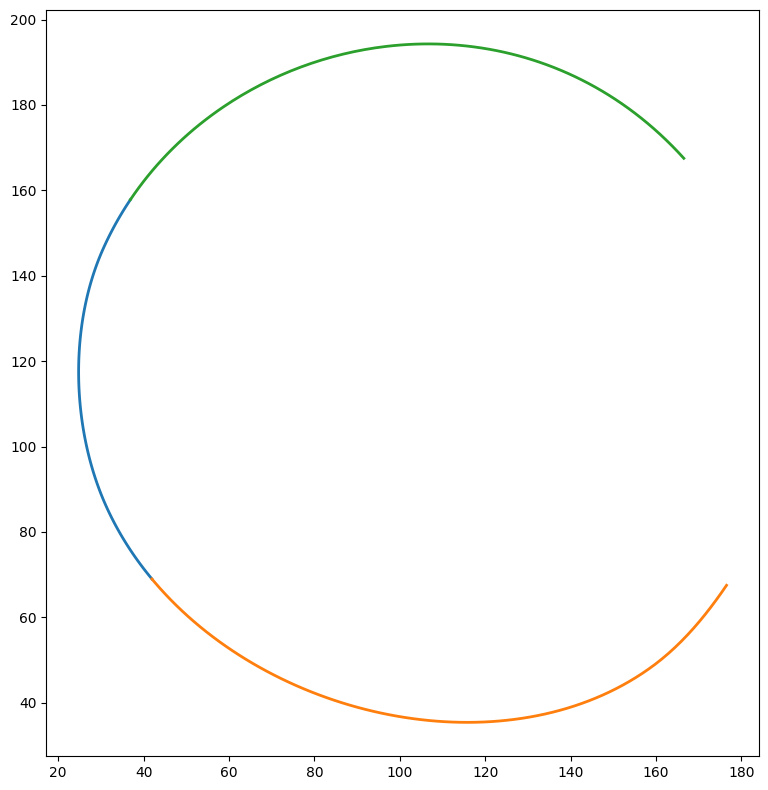

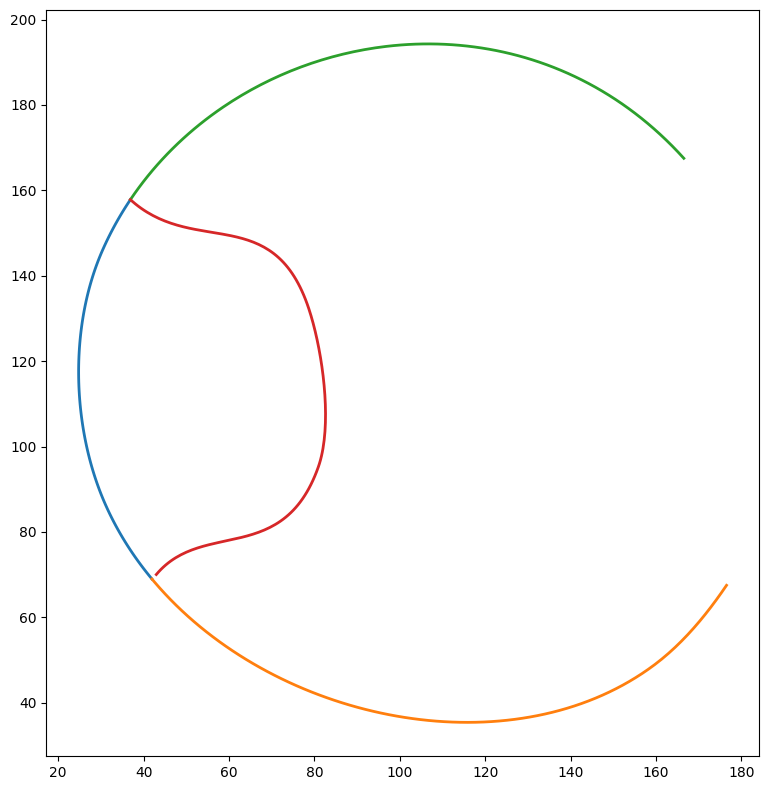

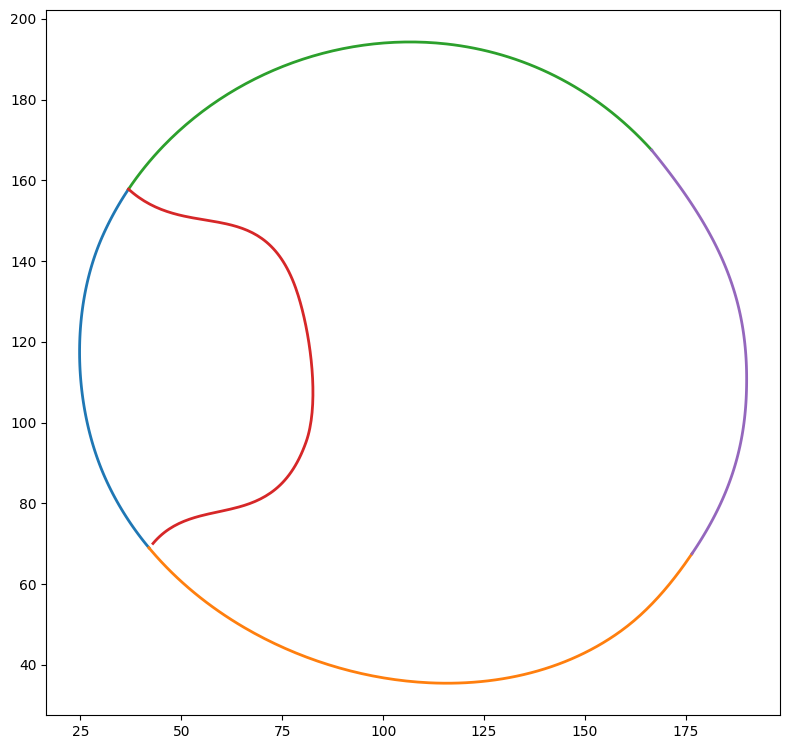

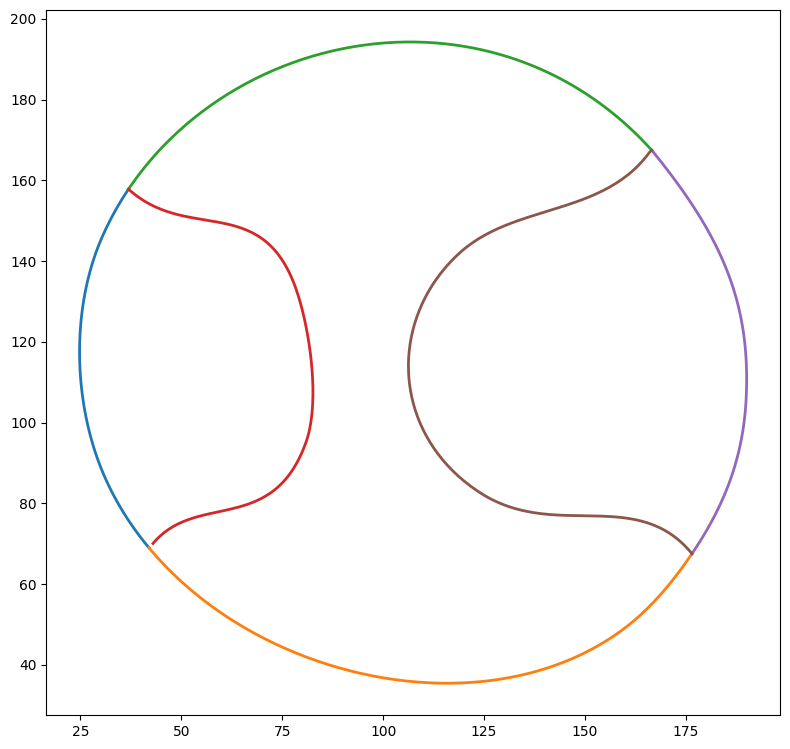

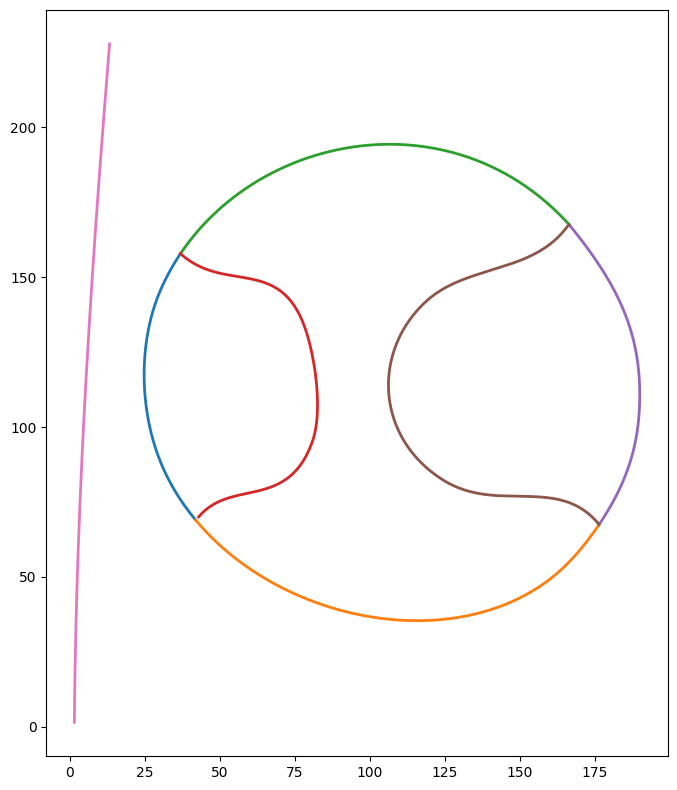

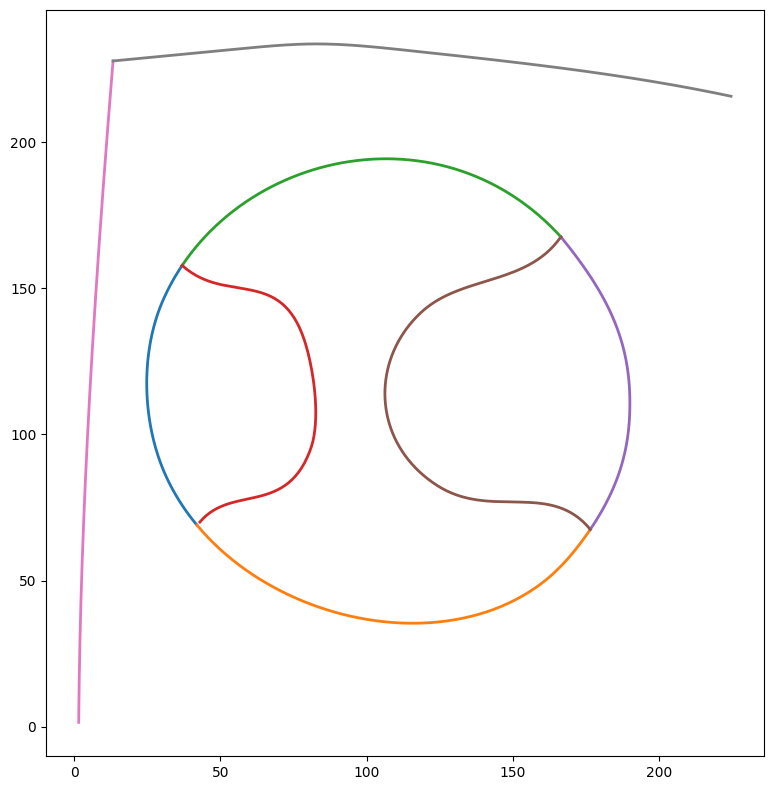

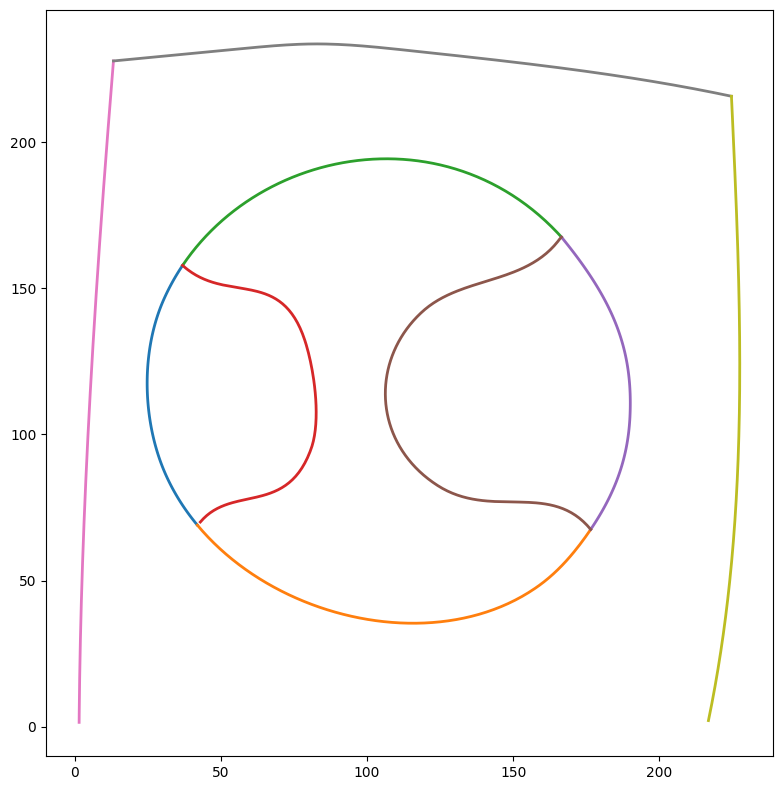

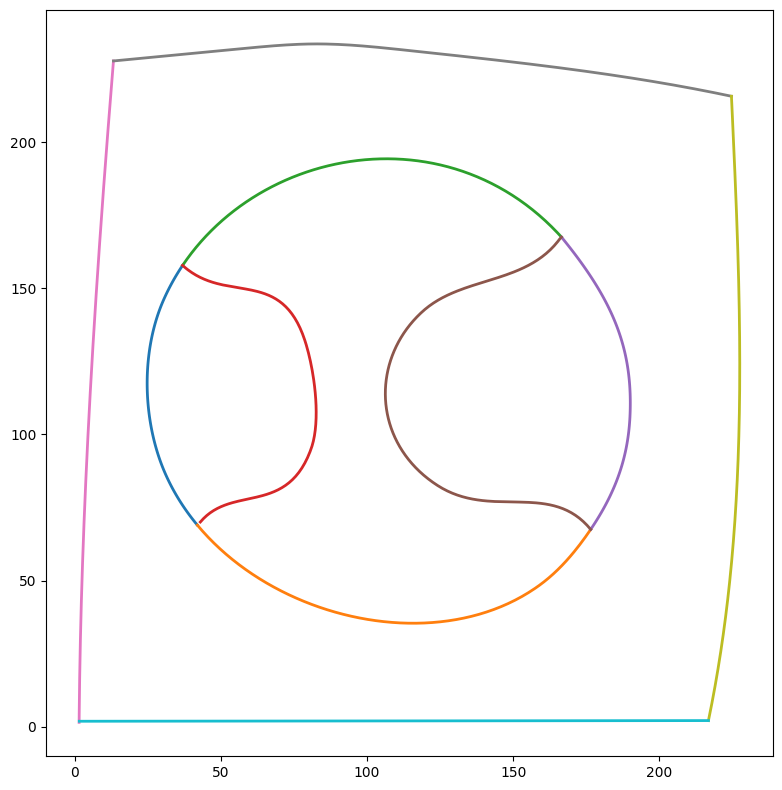

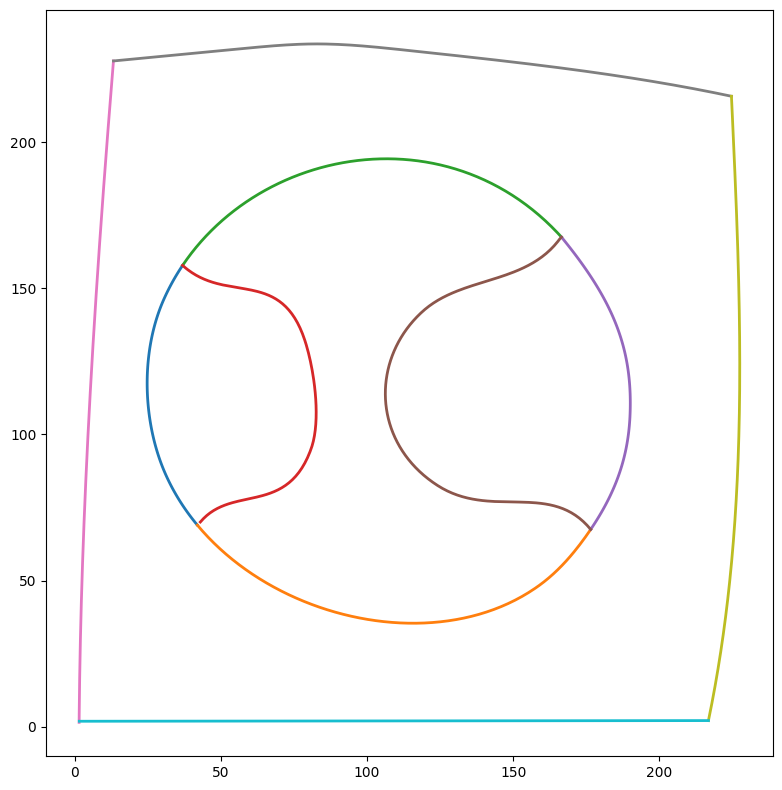

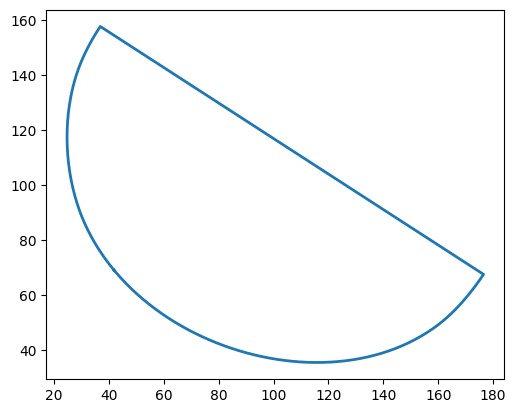

In [32]:
def main(np_path_XYs_path, np_path_XY2s_path):
    # Load data
    np_path_XYs, np_path_XY2s = load_data(np_path_XYs_path, np_path_XY2s_path)

    # Preprocess data
    XY, XY2, sz1, sz2 = preprocess_data(np_path_XYs, np_path_XY2s)

    # Visualize curves
    visualize_curves(XY, sz1)
    visualize_complete_curve(XY, sz1)

    # Analyze curves
    curve_num, partner, umap = analyze_curves(XY, sz1)

    # Reconstruct a curve example
    node_sequence = [0, 1, 2, 3]  # Replace with actual sequence
    reconstructed_curve = reconstruct_single_curve(node_sequence, umap, XY, partner)

    # Further processing or visualization can go here
    plt.plot(reconstructed_curve[:, 0], reconstructed_curve[:, 1], linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
if __name__ == "__main__":
    main('/content/dataset/frag0.csv', '/content/dataset/frag01_sol.csv')


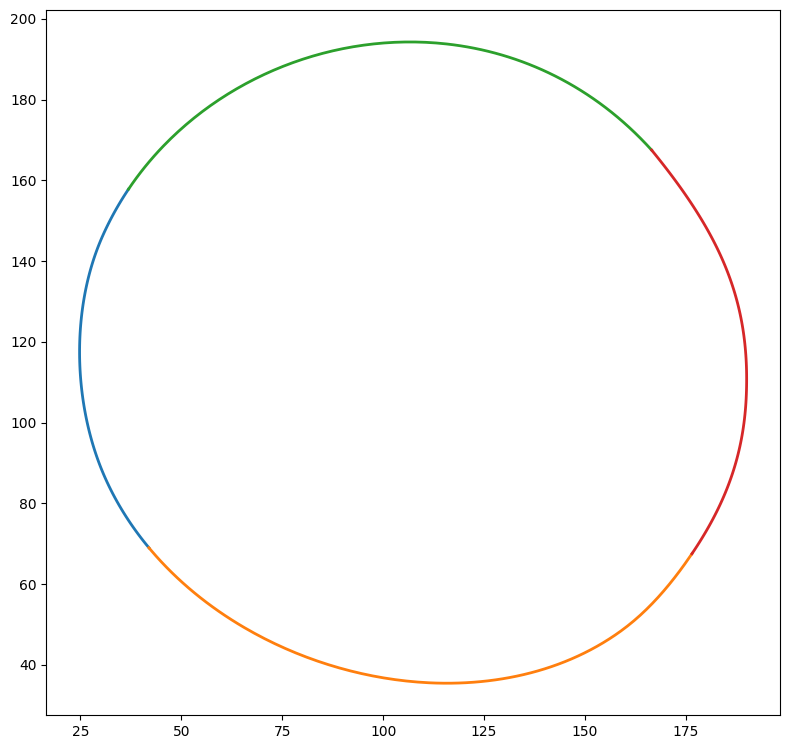

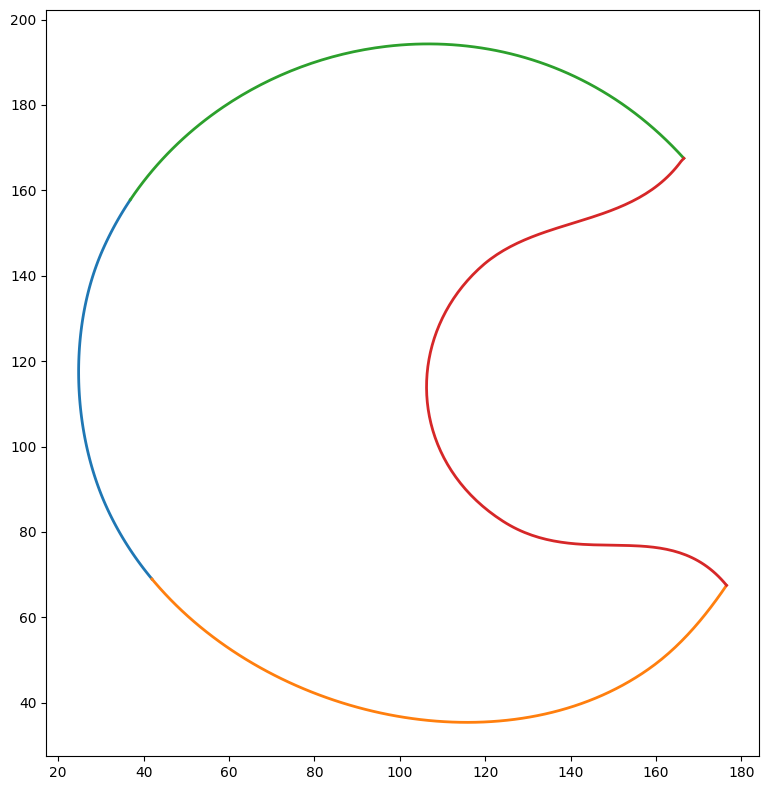

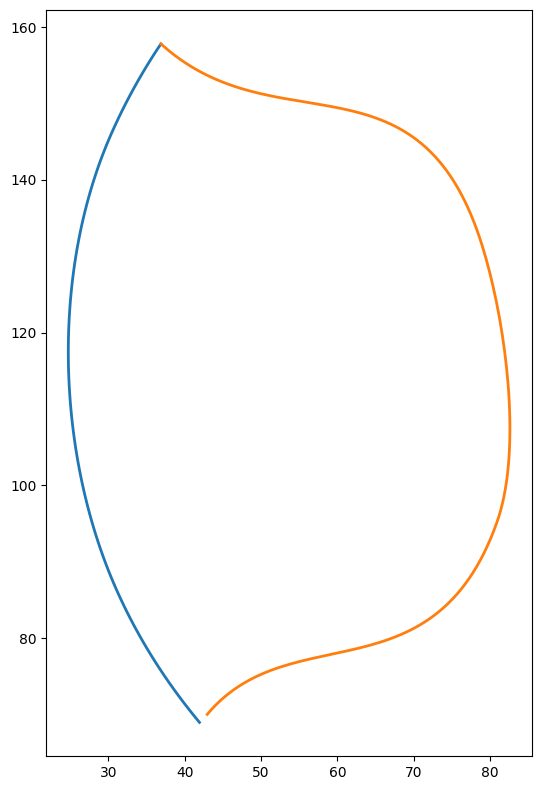

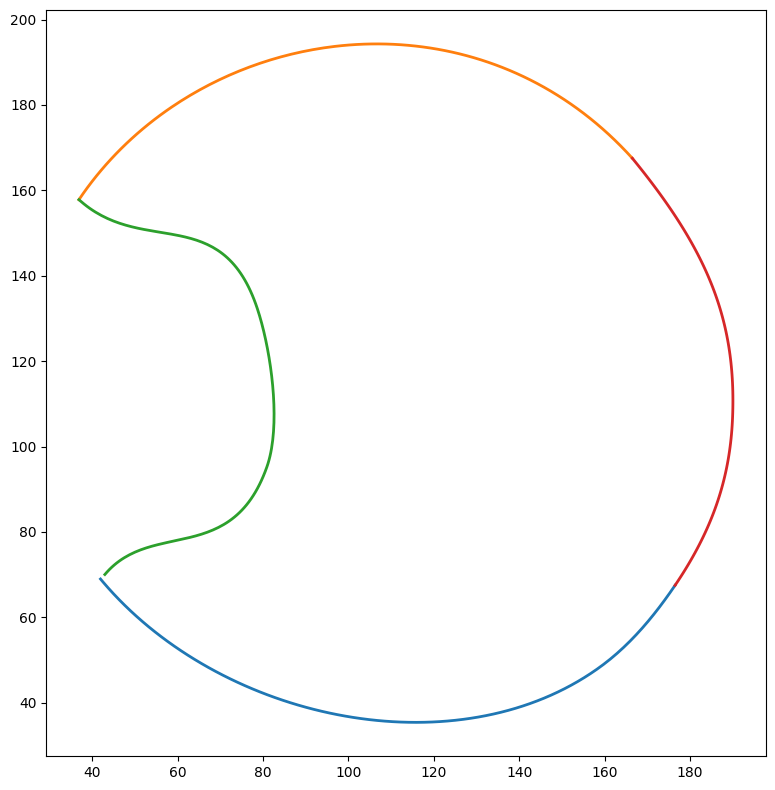

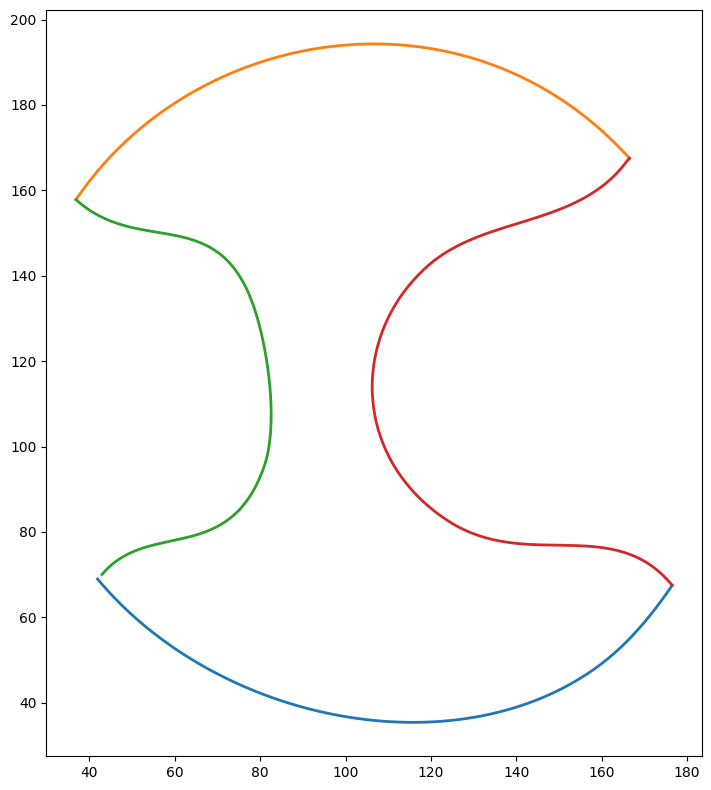

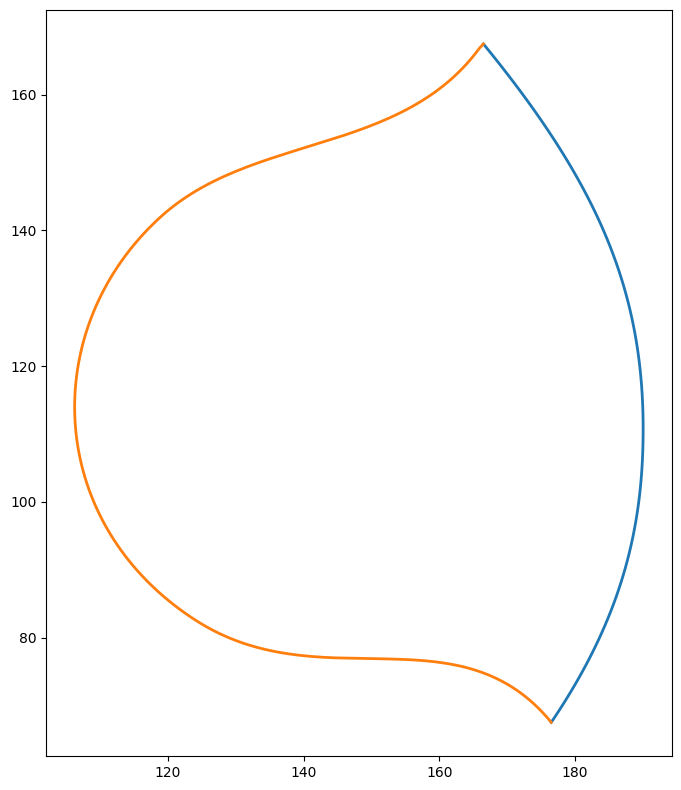

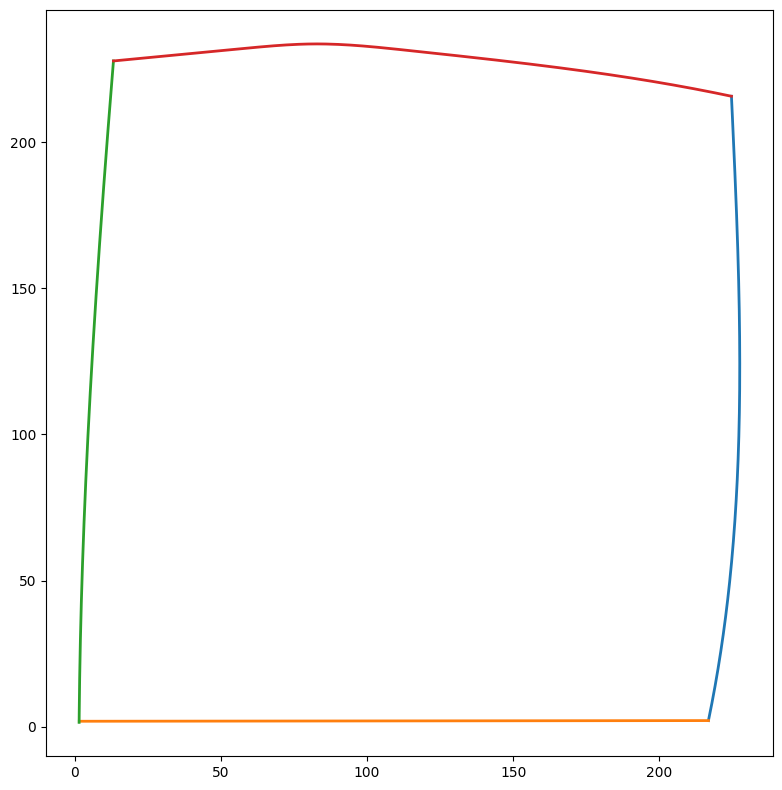

In [22]:
for i, (curve_set, path) in enumerate(closed_curves.items()):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for el in curve_set:
        ax.plot (XY[el][:, 0], XY[el][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [23]:
def reconstruct_single_curve(node_sequence, umap, XY, partner):
    curve_points = []
    i = 0

    while i < len(node_sequence) - 1:
        cur_node = node_sequence[i]
        next_node = node_sequence[i + 1]

        # Check if next node is the partner of the current node
        if partner[cur_node] != next_node:
            # Directly add the point if it's a partner
            i += 1
        else:
            # Find a curve in XY that starts or ends with the points corresponding to cur_node and next_node
            start_point = umap[cur_node]
            end_point = umap[next_node]
            found_curve = False

            for curve in XY:
                curve_start = curve[0]
                curve_end = curve[-1]

                if (np.array_equal(curve_start, start_point) and np.array_equal(curve_end, end_point)) or (np.array_equal(curve_start, end_point) and np.array_equal(curve_end, start_point)):
                    # If start_point and end_point match, add points to the curve
                    if np.array_equal(curve_start, start_point):
                        curve_points.extend(curve)
                    else:
                        curve_points.extend(curve[::-1])

                    found_curve = True
                    break

            if not found_curve:
                raise ValueError("Curve with the specified start and end points not found in XY.")

            # Move ahead to the next to next node
            i += 2

    return np.array(curve_points)

# Example usage
# node_sequence: the sequence of nodes in the closed curve
# umap: dictionary mapping node indices to points
# XY: list of curves where each curve is a sequence of points
# partner: dictionary mapping each node to its partner node